In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Computing with {}!'.format(device))

Computing with cpu!


In [2]:
from matplotlib import pyplot as plt


def ishow(img,
          cmap='viridis',
          title='',
          fig_size=(8,6),
          colorbar=False,
          interpolation='none'):
    ' Function `ishow` displays an image in a new window. '
    
    if img.min() < 0:
        img -= img.min()
        img /= img.max()
    
    extent = (0, img.shape[1], img.shape[0], 0)
    fig, ax = plt.subplots(figsize=fig_size)
    pcm = ax.imshow(img,
              extent=extent,
              cmap=cmap,
              interpolation=interpolation)
    
    ax.set_frame_on(False)
    plt.title(title)
    plt.tight_layout()
    if colorbar:
        
        fig.colorbar(pcm, orientation='vertical')
    plt.show()
    

In [3]:
from pathlib import Path


PATH = Path('data', 'data_seg_public')
town_dir = PATH / 'img'
mask_dir = PATH / 'mask'
# [ len(list(img_dir.iterdir())) for img_dir in sorted(list(town_dir.iterdir()))]

In [4]:
# [ len(list(img_dir.iterdir())) for img_dir in sorted(list(mask_dir.iterdir()))]

In [5]:
import tqdm
import pandas as pd
import glob

# samples = []
# n_samples = len(list(img_dir.glob('*')))
# towns = sorted(list(town_dir.iterdir()))
# img_files = [list(img.iterdir()) for img in towns]
# img_files = sorted([item for sublist in img_files for item in sublist])
# ann_files = list(ann_dir.iterdir())
# for img_path, ann_path in zip(img_files, ann_files):
#     # Create a dictionary for the current sample
#     sample = {
#         'img_path': img_path,
#         'ann_path': ann_path
#     }
#     # Append the dictionary to the samples list
#     samples.append(sample)



# df = pd.DataFrame(samples)
# df.loc[0]['ann_path']
# img_files

In [6]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

transforms_train = A.Compose([
                        #  augmentation 
                        #  A.ColorJitter(brightness=.5, contrast=.5, saturation=.5, hue=.1),
                        #  A.GaussNoise(),
                        #  A.HorizontalFlip(p=0.5),
                        #  A.ShiftScaleRotate(rotate_limit=30, p=1, border_mode=0, value=0, mask_value=3),
                        #  A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
                            
                        #  # preprocessing
                        #  A.SmallestMaxSize (1024),
                        #  A.CenterCrop(512, 1024),
                        #  A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
                         ToTensorV2(),
                        ]   
                    )

In [7]:
from sklearn.model_selection import train_test_split
from dataset import SampleDataset
from network import SampleModel


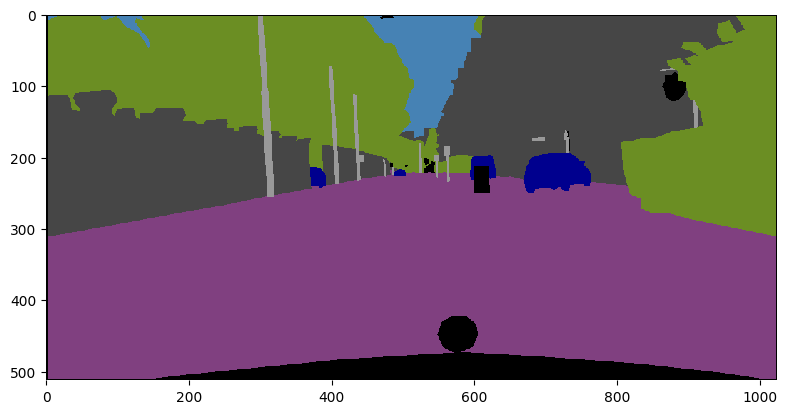

In [8]:

img_files = glob.glob("{}/*/*.png".format(town_dir))
mask_files = glob.glob("{}/*/*.png".format(mask_dir))
df = pd.DataFrame({'img': img_files, 'mask': mask_files})
train_df, valid_df = train_test_split(df, test_size=.3, random_state=2)

train_df, valid_df = train_test_split(df, test_size=.3, random_state=2)
traindataset = SampleDataset(dataset_df=train_df, transforms=transforms_train)


model = SampleModel(num_class=8)
IDX = 2285
x, y = traindataset[IDX]
# pred = model(x.unsqueeze(0))
# print(x.unsqueeze(0).shape)
ishow(y)


In [9]:

import sys
import matplotlib.pyplot as plt
from pa228_tools import ishow

import torch
import pandas as pd
from torchview import draw_graph
# from network import ModelExample
from dataset import SampleDataset
from sklearn.model_selection import train_test_split
from pathlib import Path
from network import SampleModel
from pa228_tools import  plot_seg_result, show_seg_sample
import numpy as np

import glob

# dataset_path = "/home/borisim/Documents/school/pa228/project/Project_Template/PROJCODE_UCO/data"
dataset_path = 'C:/Users/xboril/Documents/proj/PA228/data'
PATH = Path('{}'.format(dataset_path), 'data_seg_public')
img_dir = PATH / 'img'
mask_dir = PATH / 'mask'
img_files = glob.glob("{}/*/*.png".format(img_dir))
mask_files = glob.glob("{}/*/*.png".format(mask_dir))
print(len(img_files))
df = pd.DataFrame({'img': img_files, 'mask': mask_files})

import albumentations as A
from albumentations.pytorch import ToTensorV2

transforms = A.Compose([
                         A.SmallestMaxSize (512),
                         A.CenterCrop(512, 1024),
                         A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
                         ToTensorV2(),
                        ]   
                    )

train_df, valid_df = train_test_split(df, test_size=.3, random_state=2)
traindataset, valdataset = SampleDataset(train_df, transforms), SampleDataset(valid_df, transforms)





# model_path = 'model.pt'  # an example of model_path parameter
# model = torch.load(model_path)
# model.eval()


3267


In [23]:

model = SampleModel(num_class=8)
IDX = 2285
x, y = traindataset[IDX]
pred = model(x.unsqueeze(0))


In [110]:
# y.shape
wtf = y.argmax(dim=2).unsqueeze(0)
max_tensor, _ = torch.max(y, dim=2)

# target = y.unsqueeze(0)
# num_classes = 8
# reshaped_tensor = target.view(-1)
# target = torch.nn.functional.one_hot(reshaped_tensor, num_classes)

target = max_tensor.unsqueeze(0)
target.shape

torch.Size([1, 512, 1024])

In [97]:
unique_values = torch.unique(target)
print(unique_values)
# Create a mapping from unique values to indices ranging from 0 to 6
value_to_index = {value.item(): index for index, value in enumerate(unique_values)}
print(value_to_index)

# Iterate over the unique values and fill in the one-hot encoded tensor
h = target.view(-1)
print(h.shape)
for ind, value in enumerate(h):
    h[ind] = value_to_index[h[ind].item()]

# Convert the one-hot encoded tensor to have integer values from 0 to 7
# target = torch.argmax(one_hot_encoded, dim=-1)
# target.shape

tensor([  0,  70, 128, 142, 153, 180])
{0: 0, 70: 1, 128: 2, 142: 3, 153: 4, 180: 5}
torch.Size([524288])


In [109]:
target = h.view(512, 1024)


In [112]:
loss_function = torch.nn.CrossEntropyLoss()
print(pred.shape)
print(wtf.shape)
# Calculate the loss
loss = loss_function(pred, wtf)

# Print the loss
print("Loss:", loss.item())

torch.Size([1, 8, 512, 1024])
torch.Size([1, 512, 1024])
Loss: 2.1051442623138428
